[0]


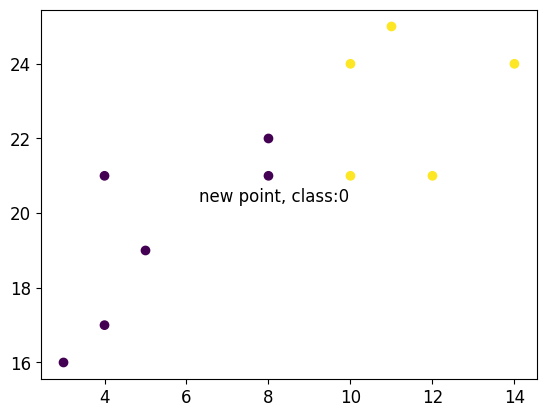

In [137]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)# čia su vienu 'kaimynu'
#n_neighbours is the number of nearest neighbors to use.
knn.fit(data, classes)
new_x, new_y = 8, 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes +[prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class:{prediction[0]}")
plt.show()

In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # 
import warnings
warnings.filterwarnings('ignore')
import os


import kagglehub

# Download latest version
path = kagglehub.dataset_download("zzero0/uci-breast-cancer-wisconsin-original")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\zzero0\uci-breast-cancer-wisconsin-original\versions\1
['breast-cancer-wisconsin.data.txt']


In [139]:
df = pd.read_csv(path+'/'+'breast-cancer-wisconsin.data.txt', header=None); df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [140]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [141]:
df.drop(columns=['Id'], inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [143]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [145]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

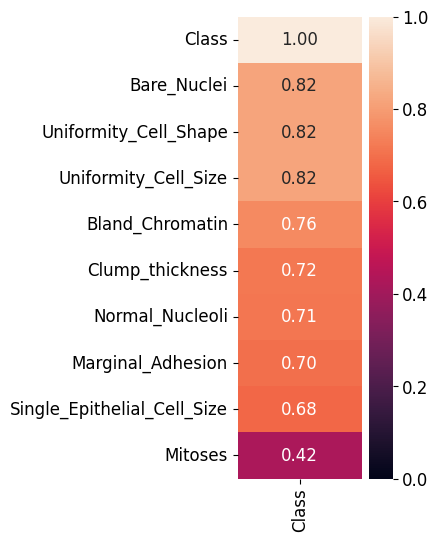

In [146]:
correlation = df.corr()
plt.figure(figsize=(2,6))
a = sns.heatmap(correlation['Class'].sort_values(ascending=False).to_frame(),  annot=True, fmt='.2f', linecolor='white', vmin=0, vmax=1)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()

In [147]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [150]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [151]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [152]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
y_pred = knn.predict(X_test); y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [155]:
from sklearn.metrics import accuracy_score
print('Acc. score', accuracy_score(y_test, y_pred))

Acc. score 0.9714285714285714


In [156]:
# score:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9821109123434705
0.9714285714285714


In [157]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [158]:
null_acc = 85/(85+55)
print(null_acc)

0.6071428571428571


In [ ]:
# patestuokite su sirtingais kaimynų kiekiais. 1 - 15. Pateikite grafiką accuracy/kaimynų kiekis

In [159]:
kaimynai = []
scorai = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.9571428571428572, 0.95, 0.9714285714285714, 0.9642857142857143, 0.9714285714285714, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9785714285714285]


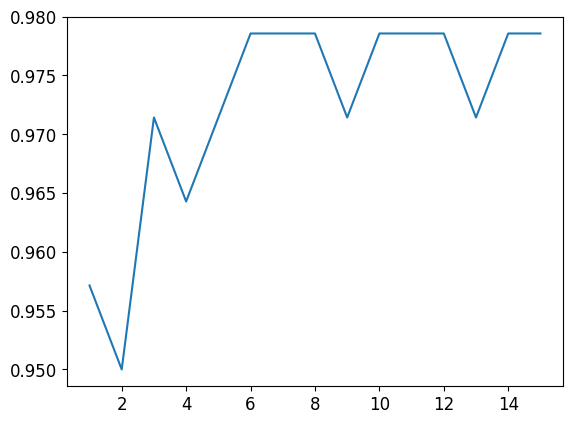

In [160]:

for i in range(1, 16):
    # print(i)
    kaimynai.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scorai.append(acc)
print(kaimynai)
print(scorai)

fig, ax = plt.subplots()
ax.plot(kaimynai, scorai)
plt.show()

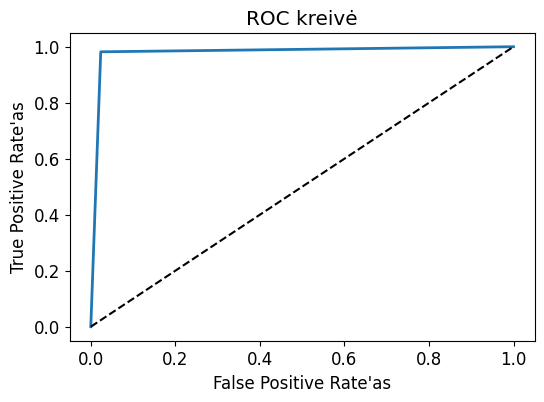

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.show()

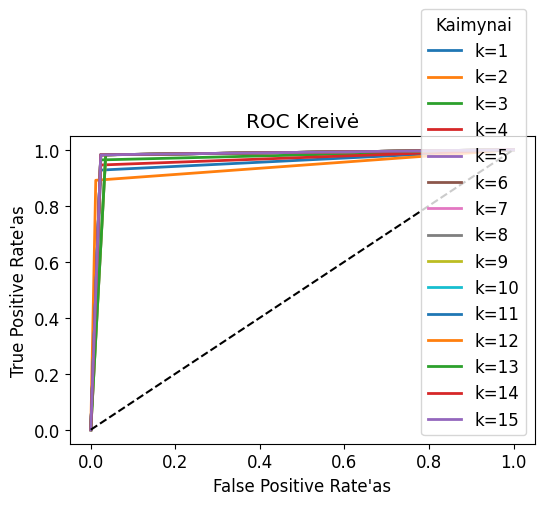

In [162]:
# Pateikite ROC kreives, kai n=1-15
kaimynai = []
fpr_list = []
tpr_list = []
for i in range(1, 16):
    kaimynai.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    

# Plot all ROC curves in one figure
plt.figure(figsize=(6,4))
for i in range(len(kaimynai)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'k={kaimynai[i]}', linewidth=2)

# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.title('ROC Kreivė')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.legend(title="Kaimynai", loc='lower right')

# Show the plot
plt.show()

   
    # plt.figure(figsize=(6,4))
    # plt.plot(fpr, tpr, linewidth=2)
    # plt.plot([0,1], [0,1], 'k--' )
    # plt.rcParams['font.size'] = 12
    # plt.title('ROC kreivė')
    # plt.xlabel('False Positive Rate\'as')
    # plt.ylabel('True Positive Rate\'as')
    # plt.show()

In [163]:
# AUC įverčiai:
pred_prob = knn.predict_proba(X_test)
pred_prob[:4]


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.13333333, 0.86666667],
       [1.        , 0.        ]])

In [164]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, pred_prob[:,1]); auc_score

np.float64(0.9874866310160428)

In [ ]:
# Pateikite AUC vertes, kai n = 1-15

In [165]:
kaimynai = []
scorai = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[np.float64(0.9518716577540106), np.float64(0.9832085561497327), np.float64(0.9824598930481283), np.float64(0.9818181818181818), np.float64(0.9811764705882353), np.float64(0.9814973262032085), np.float64(0.9805347593582888), np.float64(0.9803208556149733), np.float64(0.9800000000000001), np.float64(0.9793582887700535), np.float64(0.9789304812834225), np.float64(0.9829946524064171), np.float64(0.9845989304812834), np.float64(0.9842780748663102), np.float64(0.9874866310160428)]


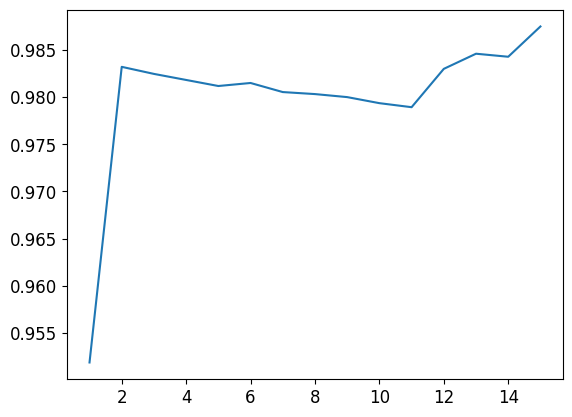

In [166]:
for i in range(1, 16):
    # print(i)
    kaimynai.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    pred_prob = knn.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    scorai.append(auc_score)
print(kaimynai)
print(scorai)

fig, ax = plt.subplots()
ax.plot(kaimynai, scorai)
plt.show()

In [ ]:
# Mykolo iškeltos idėjos proof-of-concept: 
# Paimkite 3 klasifikatorius, kNN (keiskite n, bent 3 skirtingus skaičius),
# random Forest (keiskite n_estimators, bent tris skirtingus skaičius),
# Decision Tree (keikiste max_depth, bent tris skaičius).
# Suklasifikuokite breast cancer data, ar tai yra vėžinis, ar ne.
# Pateikite visiems klasifikatoriams: confusion matrix, ROC kreives, AUC įverčius, accuracy ir kitus..
# Išrinkite geriasusią iš kiekvieno ir apskritai.

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [168]:
depths = [3, 5, 7]
fits = []
accs = []
precs = []
recs = []
f1s = []
prob_list = []
fpr_list = []
tpr_list = []

for i in depths:
    print(i)
    destree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    y_pred = destree.predict(X_test)
    fit_score = destree.score(X_test, y_test)
    # print(f'fit score: {fit_score}')
    fits.append(fit_score)

    acc = accuracy_score(y_test, y_pred)
    # print(f'Accuracy score: {acc}')
    accs.append(acc)

    precision = precision_score(y_test, y_pred, average='macro')
    # print(f'Precision score: {precision}')
    precs.append(precision)

    recall = recall_score(y_test, y_pred, average='macro')
    # print(f'Recall score: {recall}')
    recs.append(recall)

    f1 = f1_score(y_test, y_pred, average='macro')
    # print(f'F1 score: {f1}')
    f1s.append(f1)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    pred_prob = destree.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    prob_list.append(auc_score)


    # cm = confusion_matrix(y_test, y_pred, normalize='true')
    # sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
    # plt.title('Decision Tree Cunfusion Matrix')
    # plt.show()

3
5
7


In [169]:
print(fits)
print(accs)
print(precs)
print(recs)
print(f1s)

[0.9571428571428572, 0.9571428571428572, 0.95]
[0.9571428571428572, 0.9571428571428572, 0.95]
[0.95286408793067, 0.9581435697245717, 0.9523601398601399]
[0.9582887700534759, 0.9518716577540107, 0.9427807486631016]
[0.9553571428571428, 0.954780361757106, 0.9470585057533358]


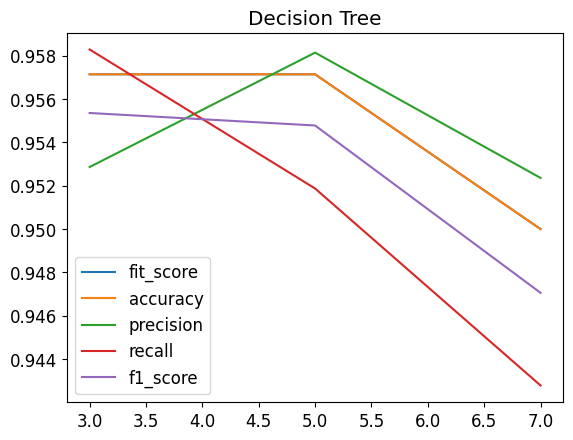

In [170]:
fig, ax = plt.subplots()
ax.plot(depths, fits, label='fit_score')
ax.plot(depths, accs, label='accuracy')
ax.plot(depths, precs, label='precision')
ax.plot(depths, recs, label='recall')
ax.plot(depths, f1s, label='f1_score')
# ax.plot(estimators, accs, label='accuracy')
# ax.plot(estimamtors, accs, label='accuracy')
plt.legend()
plt.title('Decision Tree')
plt.show()

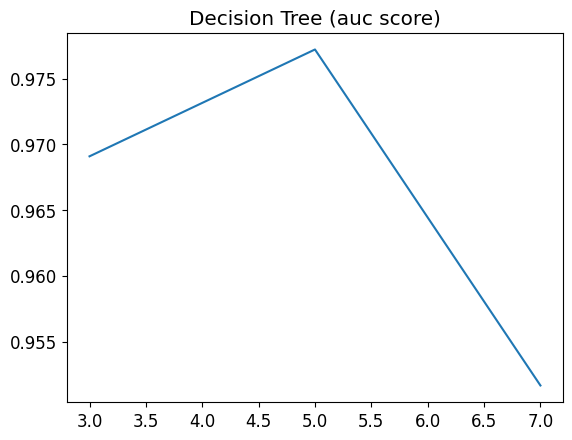

In [171]:
fig, ax = plt.subplots()
ax.plot(depths, prob_list)
plt.title('Decision Tree (auc score)')
plt.show()

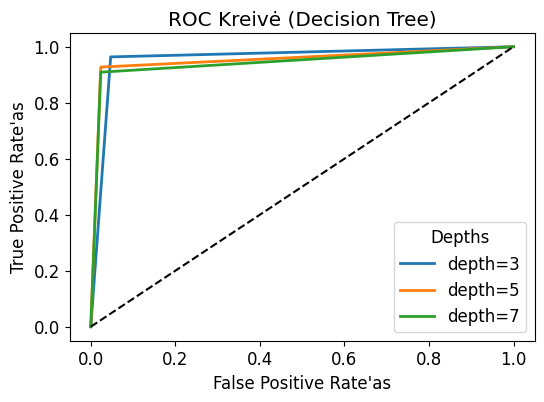

In [172]:
# Plot all ROC curves in one figure
plt.figure(figsize=(6,4))
for i in range(len(depths)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'depth={depths[i]}', linewidth=2)

# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.title('ROC Kreivė (Decision Tree)')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.legend(title="Depths", loc='lower right')

# Show the plot
plt.show()

In [190]:
estimators = [100, 200, 300]
fits = []
accs = []
precs = []
recs = []
f1s = []
prob_list = []
fpr_list = []
tpr_list = []

for i in estimators:
    print(i)
    rf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    fit_score = rf.score(X_test, y_test)
    # print(f'fit score: {fit_score}')
    fits.append(fit_score)

    acc = accuracy_score(y_test, y_pred)
    # print(f'Accuracy score: {acc}')
    accs.append(acc)

    precision = precision_score(y_test, y_pred, average='macro')
    # print(f'Precision score: {precision}')
    precs.append(precision)

    recall = recall_score(y_test, y_pred, average='macro')
    # print(f'Recall score: {recall}')
    recs.append(recall)

    f1 = f1_score(y_test, y_pred, average='macro')
    # print(f'F1 score: {f1}')
    f1s.append(f1)
    print('----------------------------------------')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    pred_prob = rf.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    prob_list.append(auc_score)


    # cm = confusion_matrix(y_test, y_pred, normalize='true')
    # sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
    # plt.title('Random Forest Cunfusion Matrix')
    # plt.show()

100
----------------------------------------
200
----------------------------------------
300
----------------------------------------


In [191]:
print(fits)
print(accs)
print(precs)
print(recs)
print(f1s)

[0.9785714285714285, 0.9785714285714285, 0.9785714285714285]
[0.9785714285714285, 0.9785714285714285, 0.9785714285714285]
[0.9761904761904763, 0.9761904761904763, 0.9761904761904763]
[0.979144385026738, 0.979144385026738, 0.979144385026738]
[0.977610746841516, 0.977610746841516, 0.977610746841516]


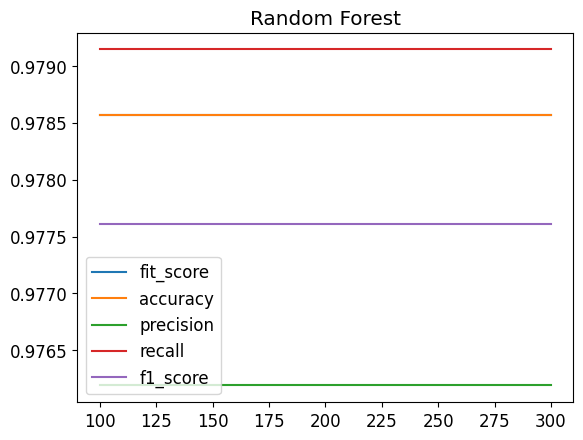

In [192]:
fig, ax = plt.subplots()
ax.plot(estimators, fits, label='fit_score')
ax.plot(estimators, accs, label='accuracy')
ax.plot(estimators, precs, label='precision')
ax.plot(estimators, recs, label='recall')
ax.plot(estimators, f1s, label='f1_score')
plt.legend()
plt.title('Random Forest')
plt.show()

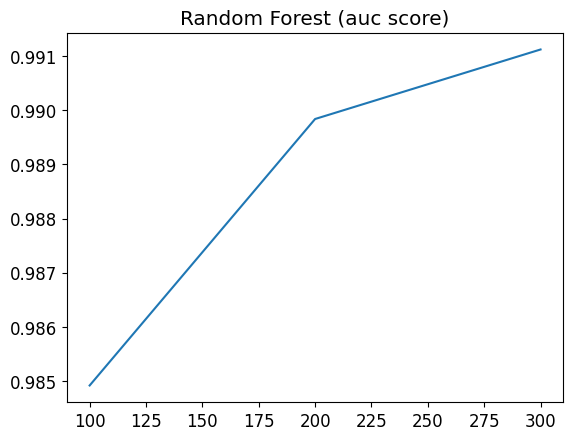

In [193]:
fig, ax = plt.subplots()
ax.plot(estimators, prob_list)
plt.title('Random Forest (auc score)')
plt.show()

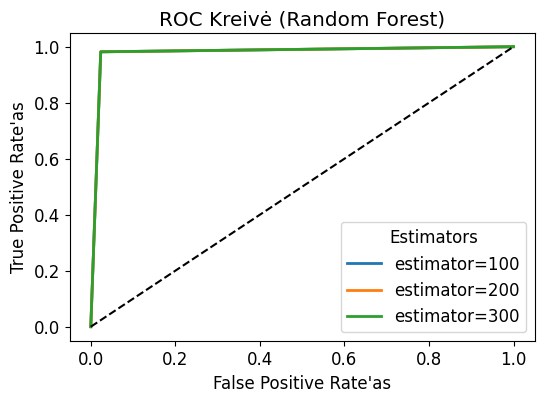

In [194]:
# Plot all ROC curves in one figure
plt.figure(figsize=(6,4))
for i in range(len(estimators)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'estimator={estimators[i]}', linewidth=2)

# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.title('ROC Kreivė (Random Forest)')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.legend(title="Estimators", loc='lower right')

# Show the plot
plt.show()

In [179]:
from sklearn.svm import SVC

In [180]:
kernels = ['poly', 'linear', 'rbf']
fits = []
accs = []
precs = []
recs = []
f1s = []
prob_list = []
fpr_list = []
tpr_list = []

for i in kernels:
    print(i)
    model = SVC(kernel=i).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fit_score = model.score(X_test, y_test)
    # print(f'fit score: {fit_score}')
    fits.append(fit_score)

    acc = accuracy_score(y_test, y_pred)
    # print(f'Accuracy score: {acc}')
    accs.append(acc)

    precision = precision_score(y_test, y_pred, average='macro')
    # print(f'Precision score: {precision}')
    precs.append(precision)

    recall = recall_score(y_test, y_pred, average='macro')
    # print(f'Recall score: {recall}')
    recs.append(recall)

    f1 = f1_score(y_test, y_pred, average='macro')
    # print(f'F1 score: {f1}')
    f1s.append(f1)
    print('----------------------------------------')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    pred_prob = rf.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    prob_list.append(auc_score)

poly
----------------------------------------
linear
----------------------------------------
rbf
----------------------------------------


In [181]:
print(fits)
print(accs)
print(precs)
print(recs)
print(f1s)

[0.9714285714285714, 0.9714285714285714, 0.9714285714285714]
[0.9714285714285714, 0.9714285714285714, 0.9714285714285714]
[0.9700534759358288, 0.9676601141407736, 0.9676601141407736]
[0.9700534759358288, 0.9732620320855615, 0.9732620320855615]
[0.9700534759358288, 0.9702380952380952, 0.9702380952380952]


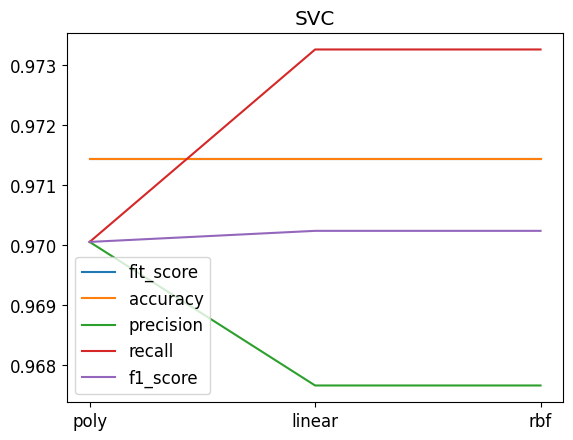

In [182]:
fig, ax = plt.subplots()
ax.plot(kernels, fits, label='fit_score')
ax.plot(kernels, accs, label='accuracy')
ax.plot(kernels, precs, label='precision')
ax.plot(kernels, recs, label='recall')
ax.plot(kernels, f1s, label='f1_score')
plt.legend()
plt.title('SVC')
plt.show()

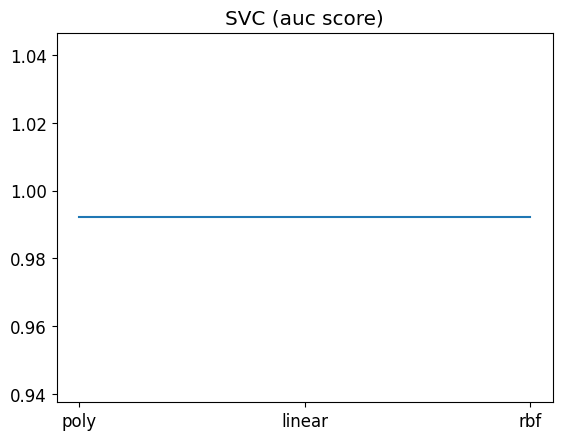

In [183]:
fig, ax = plt.subplots()
ax.plot(kernels, prob_list)
plt.title('SVC (auc score)')
plt.show()

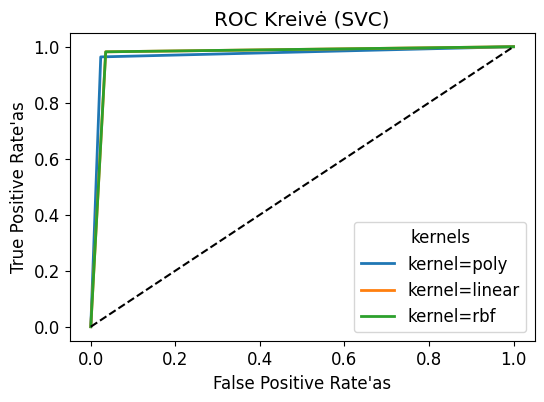

In [184]:
# Plot all ROC curves in one figure
plt.figure(figsize=(6,4))
for i in range(len(kernels)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'kernel={kernels[i]}', linewidth=2)

# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], 'k--')

# Customize plot
plt.title('ROC Kreivė (SVC)')
plt.xlabel('False Positive Rate\'as')
plt.ylabel('True Positive Rate\'as')
plt.legend(title="kernels", loc='lower right')

# Show the plot
plt.show()

In [ ]:
https://stackoverflow.com/questions/73704214/set-specific-color-for-a-value-in-plotly-choropleth-maps

https://plotly.com/python/choropleth-maps/